# SFH of UV red galaxies
In `uv_red.ipynb` I examined the SEDs and properties of simulated galaxies that are intrinsically very UV red (FUV - NUV > 2.5). In this notebook, I will examine their SFHs and answer the following questions: 
1. Do UV red galaxies have different SFHs than quiescent galaxies with comparable $M_*$ and ${\rm SFR}$? 
2. Do the UV red/quiescent galaxies in SIMBA differ from the UV red/quiescent galaxies in TNG or EAGLE? 

In [1]:
import os 
import sys 
import h5py 
import numpy as np 
# -- galpopfm --
from galpopfm import dust_infer as dustInfer
from galpopfm import measure_obs as measureObs

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
t_sfh_low, t_sfh_high = np.loadtxt('/Users/chahah/data/galpopfm/sed/simba/t_sfh.txt', unpack=True, delimiter=',', usecols=[0, 1])

In [4]:
sfh_simba = h5py.File('/Users/chahah/data/galpopfm/sed/simba/simba.sfh.m100n1024_s151_z0.00.hdf5', 'r')
sed_simba = dustInfer._read_sed('simba') 

In [5]:
sfr0_simba = sfh_simba['SFR'][...] == 0.
logsfr_simba = np.log10(sfh_simba['SFR'][...])
logsfr_simba[sfr0_simba] = -6
logssfr_simba = logsfr_simba - sed_simba['logmstar']

FUV_simba = measureObs.AbsMag_sed(sed_simba['wave'], sed_simba['sed_noneb'], band='galex_fuv') 
NUV_simba = measureObs.AbsMag_sed(sed_simba['wave'], sed_simba['sed_noneb'], band='galex_nuv')
R_simba = measureObs.AbsMag_sed(sed_simba['wave'], sed_simba['sed_noneb'], band='r_sdss')

In [6]:
cuts = (R_simba < -20) & (FUV_simba < -13.5) & (NUV_simba < -14.0)

# SFH of UV red galaxies in SIMBA 
versus SFH of other quiescent or luminous SF galaxies

In [7]:
uv_red = cuts & ((FUV_simba - NUV_simba) > 2.)
print('%i UV red galaxies in SIMBA' % np.sum(uv_red))
sf_lum = cuts & (R_simba < -22) & (logssfr_simba > -10)
q_other = cuts & (R_simba < -22) & (logssfr_simba < -11) & ~uv_red

347 UV red galaxies in SIMBA


(-6.2, 2.0)

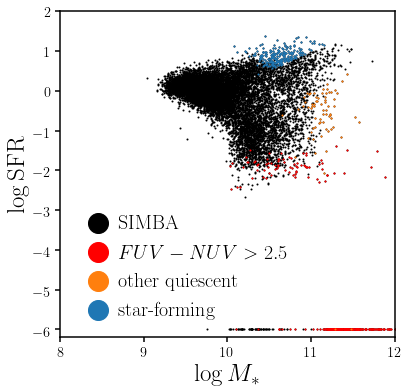

In [8]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_simba['logmstar'][cuts], logsfr_simba[cuts], c='k', s=1, label='SIMBA')
sub.scatter(sed_simba['logmstar'][uv_red], logsfr_simba[uv_red], c='r', s=1, label='$FUV-NUV > 2.5$')
sub.scatter(sed_simba['logmstar'][q_other], logsfr_simba[q_other], c='C1', s=1, label='other quiescent')
sub.scatter(sed_simba['logmstar'][sf_lum], logsfr_simba[sf_lum], c='C0', s=1, label='star-forming')
sub.legend(loc='lower left', markerscale=20, handletextpad=0., fontsize=20)
sub.set_xlabel('$\log M_*$', fontsize=25)
sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SFR}$', fontsize=25)
sub.set_ylim(-6.2, 2)

In [9]:
sfh_t_simba = np.sum(sfh_simba['StarMassFormed_in_metal_age_Bin'], axis=1)
sfr_t_simba = np.sum(sfh_simba['StarMassFormed_in_metal_age_Bin'], axis=1) / (t_sfh_high - t_sfh_low) / 1e9

Text(0.5, 0, '$t_{\\rm lookback}$')

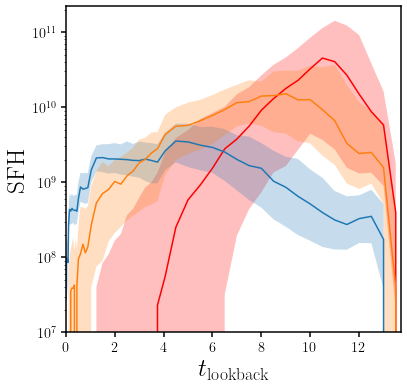

In [29]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for sample, clr in zip([uv_red, sf_lum, q_other], ['r', 'C0', 'C1']): 
    sfh_t_sample = np.quantile(sfh_t_simba[sample,:], [0.16, 0.50, 0.84], axis=0)
    
    sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
sub.set_xlim(0, 13.7)
sub.set_yscale('log')
sub.set_ylim(1e7, None)
sub.set_ylabel('SFH', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)

In [28]:
np.log10(1.82e7/1e9)

-1.739928612014925

Text(0.5, 0, '$t_{\\rm lookback}$')

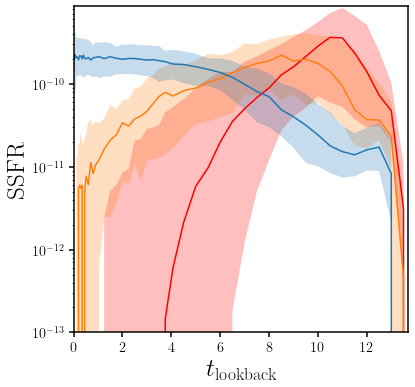

In [14]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for sample, clr in zip([uv_red, q_other, sf_lum], ['r', 'C1', 'C0']): 
    sfh_t_sample = np.quantile(sfr_t_simba[sample,:]/(10**sed_simba['logmstar'])[sample,None], [0.16, 0.50, 0.84], axis=0)
    
    sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
sub.set_xlim(0, 13.7)
sub.set_ylim(1e-13, None)
sub.set_yscale('log')
sub.set_ylabel('SSFR', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)

Now we can answer the question
1. Do UV red galaxies have different SFHs than quiescent galaxies with comparable $M_*$ and ${\rm SFR}$? 

**Yes, UV red galaxies do not have star formation for over 2 Gyrs!**

Lets see if this is also the case for TNG and EAGLE

In [17]:
sed_tng = dustInfer._read_sed('tng') 
sfh_tng = h5py.File('/Users/chahah/data/galpopfm/sed/tng/IQ_TNG_SFRHs-corrected.hdf5', 'r')

In [18]:
sfr0_tng = sed_tng['logsfr.inst'] == -999
logsfr_tng = sed_tng['logsfr.inst']
logsfr_tng[sfr0_tng] = -6
logssfr_tng = logsfr_tng - sed_tng['logmstar']

FUV_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='galex_fuv') 
NUV_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='galex_nuv')
R_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='r_sdss')
G_tng = measureObs.AbsMag_sed(sed_tng['wave'], sed_tng['sed_noneb'], band='g_sdss')

In [19]:
cuts_tng = (R_tng < -20) & (FUV_tng < -13.5) & (NUV_tng < -14.0)

In [20]:
uv_red_tng = cuts_tng & ((FUV_tng - NUV_tng) > 2.5)
print('%i UV red galaxies in TNG' % np.sum(uv_red_tng))

52 UV red galaxies in TNG


In [21]:
sf_lum_tng = cuts_tng & (R_tng < -22) & (logssfr_tng > -10)
q_other_tng = cuts_tng & (R_tng < -22) & (G_tng - R_tng > 0.6) & ~uv_red_tng

(-6.2, 4.0)

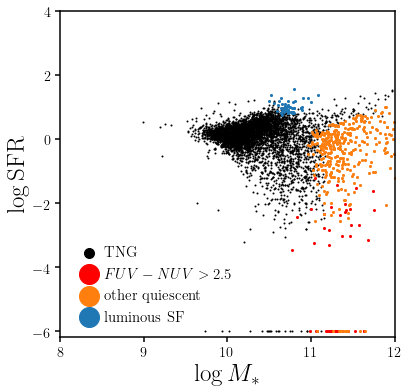

In [22]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(sed_tng['logmstar'][cuts_tng], logsfr_tng[cuts_tng], c='k', s=1, label='TNG')
sub.scatter(sed_tng['logmstar'][uv_red_tng], logsfr_tng[uv_red_tng], c='r', s=4, label='$FUV-NUV > 2.5$')
sub.scatter(sed_tng['logmstar'][q_other_tng], logsfr_tng[q_other_tng], c='C1', s=4, label='other quiescent')
sub.scatter(sed_tng['logmstar'][sf_lum_tng], logsfr_tng[sf_lum_tng], c='C0', s=4, label='luminous SF')

sub.legend(loc='lower left', markerscale=10, handletextpad=0., fontsize=15)
sub.set_xlabel('$\log M_*$', fontsize=25)

sub.set_xlim(8, 12)
sub.set_ylabel(r'$\log {\rm SFR}$', fontsize=25)
sub.set_ylim(-6.2, 4)

In [23]:
sfh_t_tng = np.sum(sfh_tng['SFRH'], axis=2) * (t_sfh_high - t_sfh_low) * 1e9
sfr_t_tng = np.sum(sfh_tng['SFRH'], axis=2) 

In [23]:
sfh_t_uv_red_tng = np.quantile(sfh_t_tng[uv_red_tng,:], [0.16, 0.50, 0.84], axis=0)
sfh_t_q_other_tng = np.quantile(sfh_t_tng[q_other_tng,:], [0.16, 0.50, 0.84], axis=0)
sfh_t_sf_lum_tng = np.quantile(sfh_t_tng[sf_lum_tng,:], [0.16, 0.50, 0.84], axis=0)

Text(0.5, 0, '$t_{\\rm lookback}$')

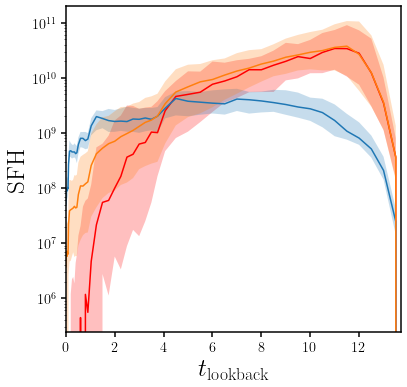

In [24]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for sample, clr in zip([uv_red_tng, sf_lum_tng, q_other_tng], ['r', 'C0', 'C1']): 
    sfh_t_sample = np.quantile(sfh_t_tng[sample,:], [0.16, 0.50, 0.84], axis=0)
    
    sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
sub.set_xlim(0, 13.7)
sub.set_yscale('log')
sub.set_ylabel('SFH', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)

Text(0.5, 0, '$t_{\\rm lookback}$')

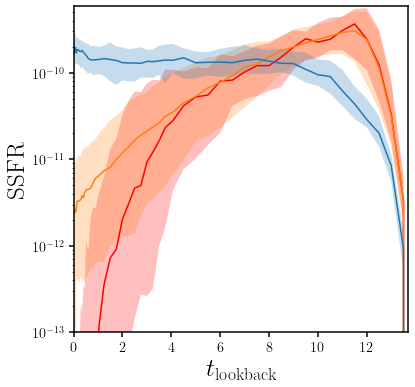

In [25]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
for sample, clr in zip([uv_red_tng, q_other_tng, sf_lum_tng], ['r', 'C1', 'C0']): 
    sfh_t_sample = np.quantile(sfr_t_tng[sample,:]/(10**sed_tng['logmstar'])[sample,None], [0.16, 0.50, 0.84], axis=0)
    
    sub.fill_between(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[0], sfh_t_sample[2], color=clr, linewidth=0, alpha=0.25)
    sub.plot(0.5 * (t_sfh_low + t_sfh_high), sfh_t_sample[1], c=clr)
sub.set_xlim(0, 13.7)
sub.set_ylim(1e-13, None)
sub.set_yscale('log')
sub.set_ylabel('SSFR', fontsize=25)
sub.set_xlabel(r'$t_{\rm lookback}$', fontsize=25)

Now we can answer the second question: 
2. Do the UV red/quiescent galaxies in SIMBA differ from the UV red/quiescent galaxies in TNG or EAGLE? 

**Yes.** In TNG, the UV red and quiescent galaxies do not have as significant of a difference in SFHs as in SIMBA. However, the UV red galaxies in general peak their SF at $z >2$ and barely have any SF in the last 2Gyr. 